# pavankumar kamble

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv(r'D:\data science\data science assg\ass.17 SVM\SalaryData_Train(1).csv')
df_test = pd.read_csv(r'D:\data science\data science assg\ass.17 SVM\SalaryData_Test(1).csv')

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

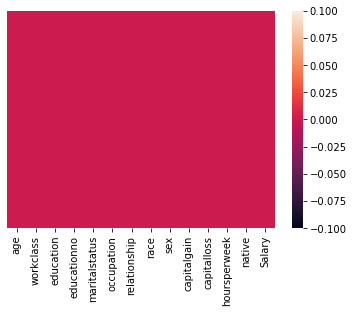

In [4]:
sns.heatmap(df_train.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Salary', ylabel='count'>

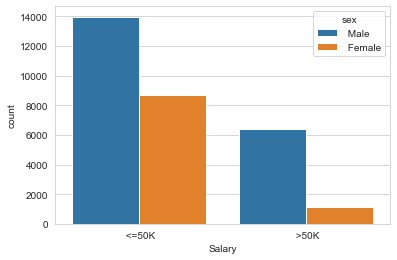

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Salary',hue='sex',data=df_train)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df_train['Salary']=le.fit_transform(df_train['Salary'])

In [8]:
le=LabelEncoder()
df_test['Salary']=le.fit_transform(df_test['Salary'])

In [9]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [10]:
X_train=df_train.drop('Salary',axis=1)
y_train=df_train['Salary']
X_test=df_test.drop('Salary',axis=1)
y_test=df_test['Salary']

# Model 

In [11]:
model=SVC(kernel='poly')
model.fit(X_train,y_train)

SVC(kernel='poly')

In [12]:
model.score(X_test,y_test)

0.7795484727755644

In [13]:
pre =model.predict(X_test)
pre

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     14672
           1       0.10      0.99      0.19       388

    accuracy                           0.78     15060
   macro avg       0.55      0.88      0.53     15060
weighted avg       0.98      0.78      0.85     15060

